# Cluster analysis

<p>Cluster Analysis: Based on the bike rental demand patterns, can you identify clusters of trip types
and/or customer types? How would you label these clusters? Can you cluster the locations based on
their demand pattern?</p>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data set import

In [2]:
# read data
# we will work with a reduced data set at first
df_bs = pd.read_csv('data/chicago_2017_REDUCED.csv', index_col=0)

df_bs.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_hour,start_day,start_month,start_weekday,max_temp,min_temp,precip,start_long,start_lat,end_lat,end_long
6,2017-01-01 00:11:34,2017-01-01 00:23:47,194,68,1145,Subscriber,0,1,1,6,-0.6,-0.6,0.0,-87.626030,41.886875,41.875885,-87.640795
19,2017-01-01 00:27:45,2017-01-01 00:31:13,128,130,5557,Subscriber,0,1,1,6,-0.6,-0.6,0.0,-87.677220,41.895769,41.903310,-87.676950
28,2017-01-01 00:35:32,2017-01-01 00:48:07,28,340,2788,Subscriber,0,1,1,6,-0.6,-0.6,0.0,-87.643320,41.914680,41.929546,-87.643118
30,2017-01-01 00:37:02,2017-01-01 00:48:43,38,26,2556,Subscriber,0,1,1,6,-0.6,-0.6,0.0,-87.630876,41.886021,41.891020,-87.617300
59,2017-01-01 01:22:16,2017-01-01 01:35:11,24,194,2535,Customer,1,1,1,6,-2.2,-2.2,0.0,-87.620620,41.891860,41.886875,-87.626030


In [3]:
# Firstly dropping the start_time & end_time
df_bs.drop(["start_time","end_time", "bike_id", "start_station_id", "end_station_id" ], axis=1, inplace=True)

In [4]:
# Replacing user_type Subscriber, Customer & Dependant by 1, 2, 3

df_bs=df_bs.replace(['Subscriber', 'Customer', 'Dependent'], [1, 2, 3])
df_bs.head()


,user_type,start_hour,start_day,start_month,start_weekday,max_temp,min_temp,precip,start_long,start_lat,end_lat,end_long
6,1,0,1,1,6,-0.6,-0.6,0.0,-87.626030,41.886875,41.875885,-87.640795
19,1,0,1,1,6,-0.6,-0.6,0.0,-87.677220,41.895769,41.903310,-87.676950
28,1,0,1,1,6,-0.6,-0.6,0.0,-87.643320,41.914680,41.929546,-87.643118
30,1,0,1,1,6,-0.6,-0.6,0.0,-87.630876,41.886021,41.891020,-87.617300
59,2,1,1,1,6,-2.2,-2.2,0.0,-87.620620,41.891860,41.886875,-87.626030


In [5]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_bs)
X_scaled = scaler.transform(df_bs)
X_scaled_df = pd.DataFrame(X_scaled, columns=df_bs.columns, index=df_bs.index)
X_scaled_df.head()

,user_type,start_hour,start_day,start_month,start_weekday,max_temp,min_temp,precip,start_long,start_lat,end_lat,end_long
6,-0.529655,-2.962060,-1.681793,-2.252714,1.548811,-1.916976,-1.912579,-0.21064,0.673518,-0.330789,-0.640705,0.042858
19,-0.529655,-2.962060,-1.681793,-2.252714,1.548811,-1.916976,-1.912579,-0.21064,-1.539020,-0.087605,0.104951,-1.515448
28,-0.529655,-2.962060,-1.681793,-2.252714,1.548811,-1.916976,-1.912579,-0.21064,-0.073792,0.429468,0.818279,-0.057265
30,-0.529655,-2.962060,-1.681793,-2.252714,1.548811,-1.916976,-1.912579,-0.21064,0.464061,-0.354144,-0.229201,1.055508
59,1.887966,-2.746709,-1.681793,-2.252714,1.548811,-2.092559,-2.088108,-0.21064,0.907349,-0.194487,-0.341899,0.679239


## Plotting the data

In [7]:
#sns.pairplot(data=BS_scaled, hue="user_type")
# not working

## K-means

In [6]:
from sklearn.cluster import KMeans

In [9]:
k_max = 50

In [10]:
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

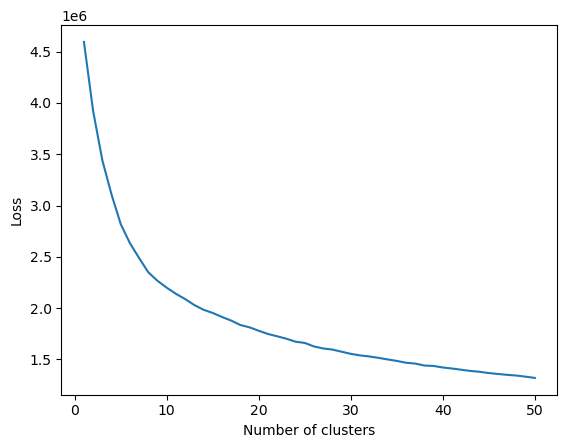

In [11]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 15.0)

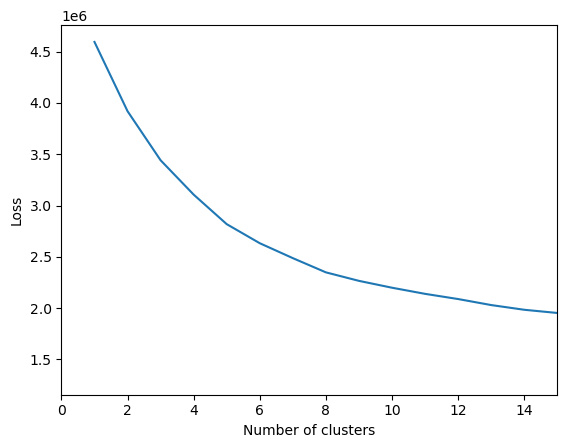

In [13]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,15])

In [14]:
eight_means = KMeans(n_clusters=8)
eight_means.fit(X_scaled)

# match records to clusters by calling predict
eight_means.predict(X_scaled)

array([6, 6, 6, ..., 3, 3, 3], dtype=int32)

In [16]:
X_scaled_df["Cluster"] = eight_means.predict(X_scaled)
sns.pairplot(data=X_scaled_df, hue="Cluster")

KeyboardInterrupt: 

## Principal Component Analysis

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
bike_scaled_pca = pca.fit_transform(df_bs)

In [23]:
sum(pca.explained_variance_ratio_)

0.984796969047214

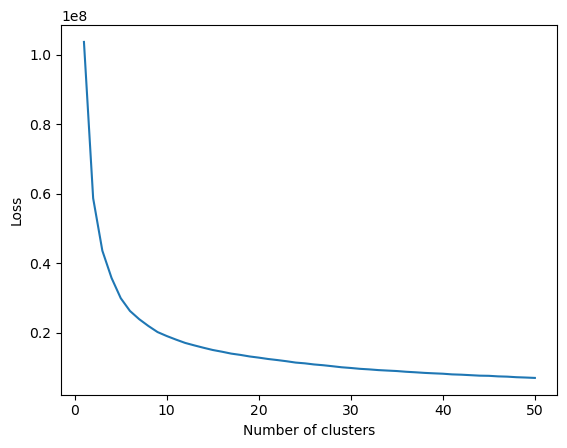

In [24]:
clusters = []
losses = []
k_max_2 = 50

for i in range(k_max_2):
    model = KMeans(n_clusters=i+1)
    model.fit(bike_scaled_pca)
    clusters.append(i+1)
    losses.append(model.inertia_)
    
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 10.0)

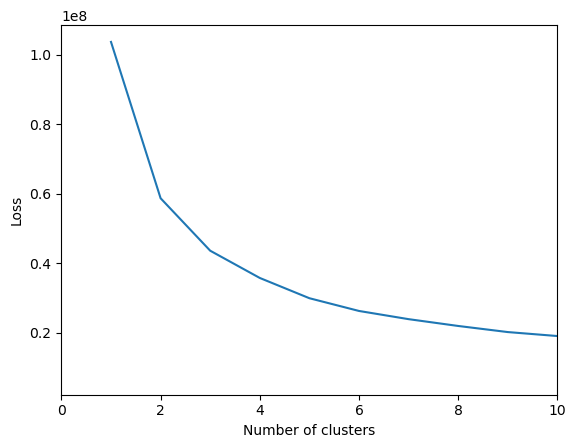

In [25]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,10])

In [26]:
bike_cluster = KMeans(n_clusters=4)
bike_cluster.fit(bike_scaled_pca)

KMeans(n_clusters=4)

In [29]:
bike_df = pd.DataFrame(bike_scaled_pca, index=df_bs.index)
bike_df.columns = ["PC"+str(column+1) for column in bike_df.columns]
bike_df["Cluster"] = bike_cluster.predict(bike_scaled_pca)
bike_df.head()

,PC1,PC2,PC3,PC4,Cluster
6,27.024333,-13.214235,10.358575,-6.201227,3
19,27.024335,-13.214234,10.358555,-6.201230,3
28,27.024327,-13.214236,10.358552,-6.201236,3
30,27.024331,-13.214236,10.358578,-6.201229,3
59,29.135730,-13.131444,9.088827,-6.063105,3


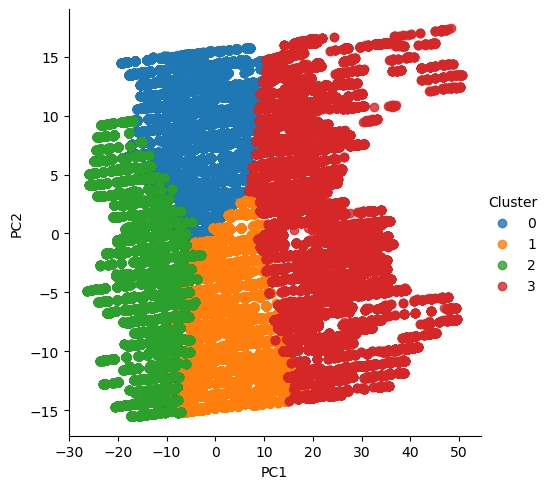

In [32]:
sns.lmplot(x="PC1", y="PC2", data=bike_df, fit_reg=False, hue="Cluster")